##  Birth-months advantage in sport.
Team member: Jimmy Wong, Oleksii Lavrenin, Nana Kweku Edusah

Github: https://github.com/olavrenin-data-scientist/Project2_Wong_Edusah_Lavrenin

Datasets: 

https://github.com/rfordatascience/tidytuesday/blob/main/data/2024/2024-01-09/canada_births_1991_2022.csv

https://github.com/rfordatascience/tidytuesday/blob/main/data/2024/2024-01-09/nhl_player_births.csv

https://github.com/rfordatascience/tidytuesday/blob/main/data/2024/2024-01-09/nhl_rosters.csv

https://github.com/rfordatascience/tidytuesday/blob/main/data/2024/2024-01-09/nhl_teams.csv




## Data structure
1. NHL Player Birth Records (From NHL Rosters)
Observations: Over 7,000 rows, each representing a unique player-season entry across NHL team rosters.
 
Key Variables:
 
player_id  – A unique ID for each NHL player helps us to remove duplicates and identify distinct players.
 
birth_date – Full date of birth from which we detect the birth month variable used in the analysis.
 
birth_country – Country of birth.
 
position_type – Player’s general position.
 
team_code – NHL team abbreviation. We can track regional effects.
 
Most useful variables:
 
birth_date - for a fetching months from date of birth date.
 
birth_country - for detecting only Canadian native players.
 
player_id  - distinct players (without duplication of records).
 
position_type -  roles in the team.

 


2. Canadian Birth Records (Canada, 1991–2022)
Observations: 384 rows — one row for each month from 1991 to 2022 (32 years × 12 months)
 
Purpose: Define a baseline month of birth for the Canadian population.
 
Key Variables:
 
year - calendar year of birthday.
 
month  - calendar month of birthday.
 
births – number of birthdays in specific months.
 
Most useful variables:
 
month and aggregated births - help to detect total numbers for months and years.
 
These datasets help to understand the statistical months of birthdays for Canadian players vs the common Canadian population and detect the potential mismatch.


## Introduction

The sports industry has a bias that many individuals born earlier sometimes have advantages in power and skillset. This is a unique phenomenon known as birth months advantage or relative effect (ARE). For example, in your league of ice hockey, this effect is very notable, when athletes were born In January and compete against kids born in late December. With this 11–12-month difference, older children are more skilled and stronger, and this impacts long-term success. This project researches and analyzes the birth-months advantage effect in the Canadian NHL league between hockey players. The research on this pattern is very important because the bias can potentially influence the selection of players by coaches and unequal training for players. Coaches, who believe in this bias can give more preference to players who were born in earlier months.


## Questions
1. Do we have a disproportion in the number of NHL players born in January and December?
2. What birth-month results NHL players vs the general Canadian population?
3. Do we have consistent or inconsistent effects where players were born before and after 2000?
4. Does the birth-month effect reflect on position?
5. How does the effect affect goaltenders vs defensemen?
6. Do some teams have more or fewer players in early months vs other teams?
7. Does this phenomenon exist only in hockey or in other sports too? Example: compare with additional dataset for football (NHL).

## Sanity checking
Before performing deeper analysis, we validate:
- Dates are pulled correctly and filtered
- Only Canadian-born players are included
- Deduplication of players by id
- Monthly distributions sum to 100%


## Load and Prepare Data

In [286]:
import pandas as pd

# Load datasets
canadian_births_df = pd.read_csv('data/canada_births_1991_2022.csv')
players_df = pd.read_csv('data/nhl_player_births.csv')
rosters_df = pd.read_csv('data/nhl_rosters.csv')
teams_df = pd.read_csv('data/nhl_teams.csv')


## Dataset Dimensions and Samples

In [ ]:
# Canadian Birth Records (1991–2022)
print("Canadian Birth Records:")
print(canadian_births_df.shape)
print(canadian_births_df.describe(include='all'))
print(canadian_births_df.head())

# NHL Player Birth Records
print("NHL Player Birth Records:")
print(players_df.shape)
print(players_df.describe(include='all'))
print(players_df.head())

# NHL Rosters by Team/Season
print("NHL Roster Sample:")
print(rosters_df.shape)
print(rosters_df.head())

# NHL Team Reference
print("NHL Teams:")
print(teams_df.shape)
print(teams_df.head())

NHL Roster Sample:
(54883, 20)
  team_code    season position_type  player_id  \
0       ATL  19992000      forwards    8467867   
1       ATL  19992000      forwards    8445176   
2       ATL  19992000      forwards    8460014   
3       ATL  19992000      forwards    8460510   
4       ATL  19992000      forwards    8459596   

                                            headshot first_name  last_name  \
0  https://assets.nhle.com/mugs/nhl/19992000/ATL/...      Bryan      Adams   
1  https://assets.nhle.com/mugs/nhl/19992000/ATL/...     Donald    Audette   
2  https://assets.nhle.com/mugs/nhl/19992000/ATL/...       Eric   Bertrand   
3  https://assets.nhle.com/mugs/nhl/19992000/ATL/...      Jason  Botterill   
4  https://assets.nhle.com/mugs/nhl/19992000/ATL/...     Andrew   Brunette   

   sweater_number position_code shoots_catches  height_in_inches  \
0            26.0             L              L              72.0   
1            28.0             R              R              68.

## Preprocess Player Data

In [ ]:
# Convert birth_date to datetime
players_df['birth_date'] = pd.to_datetime(players_df['birth_date'], errors='coerce')
players_df = players_df.dropna(subset=['birth_date'])  # Drop rows with invalid dates

# Extract birth month and year
players_df['birth_month'] = players_df['birth_date'].dt.month
players_df['birth_year'] = players_df['birth_date'].dt.year

# Filter Canadian-born players
canadian_players = players_df[players_df['birth_country'] == 'CAN'].copy()
canadian_players = canadian_players.drop_duplicates(subset='player_id')
canadian_players


,player_id,first_name,last_name,birth_date,birth_city,birth_country,birth_state_province,birth_year,birth_month
0,8467867,Bryan,Adams,1977-03-20,Fort St. James,CAN,British Columbia,1977,3
1,8445176,Donald,Audette,1969-09-23,Laval,CAN,Quebec,1969,9
2,8460014,Eric,Bertrand,1975-04-16,St-Ephrem,CAN,Quebec,1975,4
3,8460510,Jason,Botterill,1976-05-19,Edmonton,CAN,Alberta,1976,5
4,8459596,Andrew,Brunette,1973-08-24,Sudbury,CAN,Ontario,1973,8
...,...,...,...,...,...,...,...,...,...
8462,8481133,Cole,Reinhardt,2000-02-01,Calgary,CAN,Alberta,2000,2
8466,8482092,Ridly,Greig,2002-08-08,Lethbridge,CAN,Alberta,2002,8
8467,8481679,Maxence,Guenette,2001-04-28,L'Ancienne-Lorette,CAN,Quebec,2001,4
8470,8480867,Kevin,Mandolese,2000-08-22,Blainville,CAN,Quebec,2000,8


## Is there a January–December birth-month bias?

In [289]:
jan_pct_nhl = (canadian_players['birth_month'] == 1).mean() * 100
dec_pct_nhl = (canadian_players['birth_month'] == 12).mean() * 100

print(f"January % of Canadian NHL players: {jan_pct_nhl:.2f}%")
print(f"December % of Canadian NHL players: {dec_pct_nhl:.2f}%")


January % of Canadian NHL players: 9.93%
December % of Canadian NHL players: 6.58%


## Compare NHL player birth-month distribution to Canadian population

In [290]:
# Canadian birth month distribution
canadian_births_by_month = canadian_births_df.groupby('month')['births'].sum()
canadian_births_pct = canadian_births_by_month / canadian_births_by_month.sum() * 100

# NHL player birth month distribution
nhl_birth_month_counts = canadian_players['birth_month'].value_counts().sort_index()
nhl_birth_month_pct = nhl_birth_month_counts / nhl_birth_month_counts.sum() * 100

# Align both distributions
nhl_birth_month_pct = nhl_birth_month_pct.reindex(range(1, 13), fill_value=0)
canadian_births_pct = canadian_births_pct.reindex(range(1, 13), fill_value=0)

# Print side-by-side
comparison_df = pd.DataFrame({
    'Month': range(1, 13),
    'NHL Players (%)': nhl_birth_month_pct.values,
    'Canada Population (%)': canadian_births_pct.values
})
comparison_df


,Month,NHL Players (%),Canada Population (%)
0,1,9.930505,8.015265
1,2,9.747623,7.545096
2,3,9.381858,8.480224
3,4,9.619605,8.372814
4,5,9.528164,8.765969
5,6,8.467447,8.523528
6,7,7.991953,8.875414
7,8,7.187271,8.718995
8,9,7.699342,8.680416
9,10,7.022677,8.367415


### Visualization: NHL vs Canada Population by Birth Month

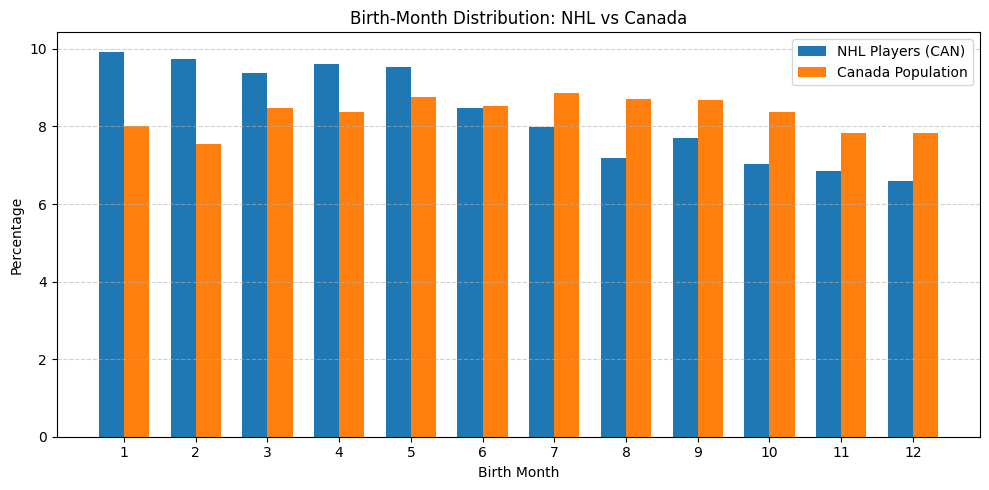

In [291]:
import matplotlib.pyplot as plt

months = range(1, 13)
bar_width = 0.35

plt.figure(figsize=(10, 5))
plt.bar([m - bar_width/2 for m in months], nhl_birth_month_pct.values, width=bar_width, label='NHL Players (CAN)')
plt.bar([m + bar_width/2 for m in months], canadian_births_pct.values, width=bar_width, label='Canada Population')

plt.xlabel('Birth Month')
plt.ylabel('Percentage')
plt.title('Birth-Month Distribution: NHL vs Canada')
plt.xticks(months)
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Has the birth-month advantage changed over time?

In [292]:
# Compare players born before and after 2000
pre_2000 = canadian_players[canadian_players['birth_year'] < 2000]
post_2000 = canadian_players[canadian_players['birth_year'] >= 2000]

pre_2000_pct = pre_2000['birth_month'].value_counts(normalize=True).sort_index() * 100
post_2000_pct = post_2000['birth_month'].value_counts(normalize=True).sort_index() * 100

pre_2000_pct = pre_2000_pct.reindex(range(1, 13), fill_value=0)
post_2000_pct = post_2000_pct.reindex(range(1, 13), fill_value=0)

pre_2000_pct, post_2000_pct


(birth_month
 1     9.767874
 2     9.693593
 3     9.340761
 4     9.637883
 5     9.526462
 6     8.486537
 7     8.022284
 8     7.223770
 9     7.706592
 10    7.056639
 11    6.889508
 12    6.648097
 Name: proportion, dtype: float64,
 birth_month
 1     20.481928
 2     13.253012
 3     12.048193
 4      8.433735
 5      9.638554
 6      7.228916
 7      6.024096
 8      4.819277
 9      7.228916
 10     4.819277
 11     3.614458
 12     2.409639
 Name: proportion, dtype: float64)

### Visualization: Pre-2000 vs Post-2000 NHL Players

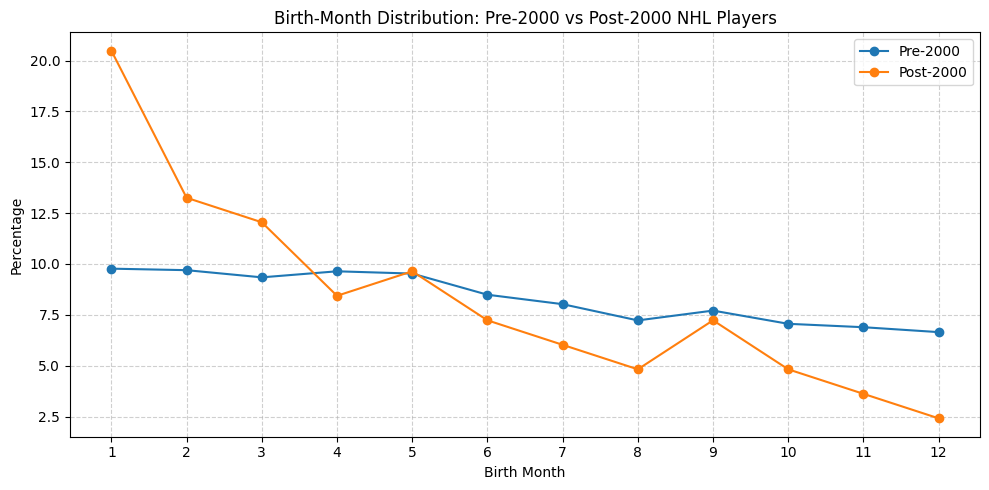

In [293]:
plt.figure(figsize=(10, 5))
plt.plot(months, pre_2000_pct.values, marker='o', label='Pre-2000')
plt.plot(months, post_2000_pct.values, marker='o', label='Post-2000')

plt.xlabel('Birth Month')
plt.ylabel('Percentage')
plt.title('Birth-Month Distribution: Pre-2000 vs Post-2000 NHL Players')
plt.xticks(months)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [294]:
# Create DataFrame comparing NHL and Canadian birth distributions
merged_df = pd.DataFrame({
    "Month": range(1, 13),
    "% of NHL births": nhl_birth_month_pct.values,
    "% of Canadian births 1991-2022": canadian_births_pct.values
})

# Calculate the difference between NHL players and general Canadian population
merged_df["NHL minus population"] = (
    merged_df["% of NHL births"] - merged_df["% of Canadian births 1991-2022"]
)

# Map numeric month to month names for plotting
ordered_months = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
merged_df["Month Name"] = merged_df["Month"].apply(lambda x: ordered_months[x - 1])
merged_df.set_index("Month Name", inplace=True)

merged_df.head()

,Month,% of NHL births,% of Canadian births 1991-2022,NHL minus population
Month Name,,,,
January,1,9.930505,8.015265,1.915239
February,2,9.747623,7.545096,2.202526
March,3,9.381858,8.480224,0.901635
April,4,9.619605,8.372814,1.246791
May,5,9.528164,8.765969,0.762195


We will first explore the distribution of Canadian's birth by month of the year to set the baseline. The population data we use is the Canadian births from 1991 to 2022.

In [295]:
pivot_table = pd.pivot_table(canadian_births_df, values='births', index='month', aggfunc='sum')
column_totals = pivot_table.sum(axis=0)
percent_pivot = (pivot_table.div(column_totals, axis=1) * 100).round(1)
percent_pivot.rename(columns={'births': '% of Canadian births 1991-2022'}, inplace=True)
month_names = {
    1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June",
    7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"
}
percent_pivot.index = percent_pivot.index.map(month_names)
percent_pivot

,% of Canadian births 1991-2022
month,
January,8.0
February,7.5
March,8.5
April,8.4
May,8.8
June,8.5
July,8.9
August,8.7
September,8.7


We can see the general Canadian population birth for each month ranges from 7.5% to 8.9%

Now let's look at the NHL players birth by month of year for the same period (birth year after 1991).

In [296]:
rosters_df['birth_date'] = pd.to_datetime(rosters_df['birth_date'])
rosters_df['birth_date'] = pd.to_datetime(rosters_df['birth_date'], errors='coerce')
# create column for birth_month
rosters_df['birth_month'] = rosters_df['birth_date'].dt.month
# create column for birth_year
rosters_df['birth_year'] = rosters_df['birth_date'].dt.year

# filter for only Canadian births
filtered_df = rosters_df[rosters_df['birth_country'] == 'CAN']
# filter for birth year after 1991
filtered_df = rosters_df[rosters_df['birth_year'] >1991]
# calculate % of NHL birth by month of year
monthly_counts = rosters_df.groupby('birth_month')['player_id'].count()
total_players = monthly_counts.sum()
monthly_percentage = (monthly_counts / total_players * 100).round(1)
month_names = {
    1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June",
    7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"
}
monthly_percentage.index = monthly_percentage.index.map(month_names)

# Reorder the table by calendar month order
ordered_months = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
result_table = monthly_percentage.to_frame(name="% of NHL births")
result_table


,% of NHL births
birth_month,
January,10.2
February,9.7
March,9.6
April,9.1
May,9.0
June,8.5
July,8.3
August,7.0
September,7.4


Now let's compare the two

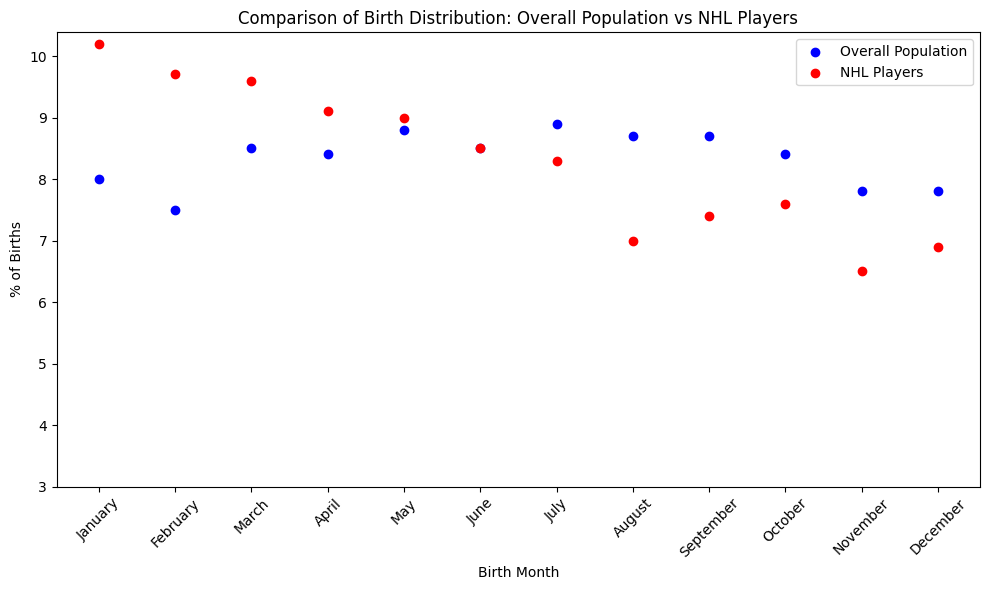

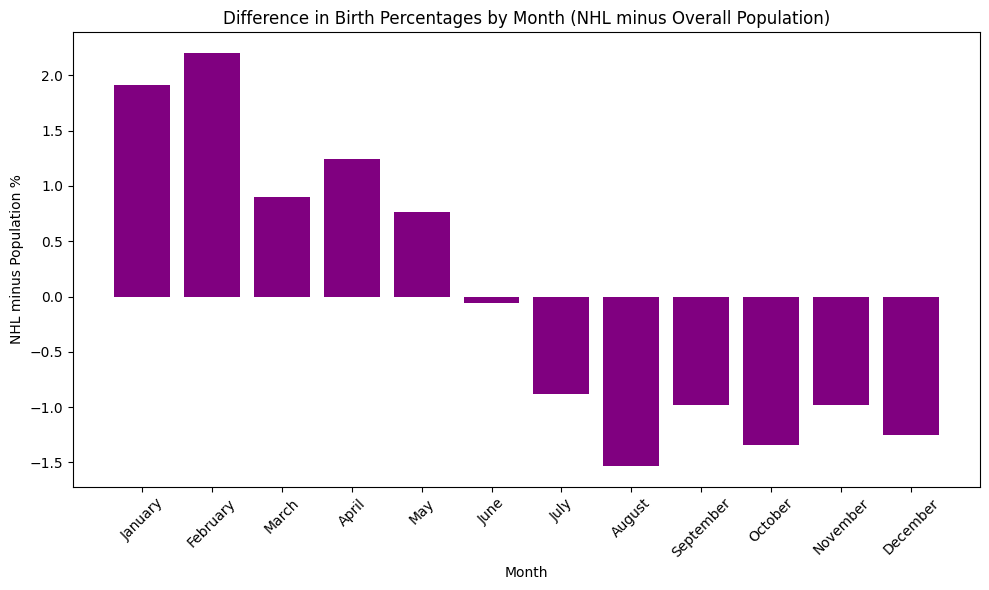

In [297]:
### plot the birth distribution of NHL and overall population##

x = np.arange(len(ordered_months))

plt.figure(figsize=(10, 6))

# Plot the overall population data as blue dots.
plt.scatter(x, percent_pivot, label='Overall Population', color='blue', zorder=3)

# Plot the NHL players data as red dots.
plt.scatter(x, result_table, label='NHL Players', color='red', zorder=3)


# Customize the x-axis with month names.

plt.xticks(x, ordered_months, rotation=45)
plt.xlabel('Birth Month')
plt.ylabel('% of Births')
plt.title('Comparison of Birth Distribution: Overall Population vs NHL Players')
plt.ylim(bottom=3.0)
plt.legend()
plt.tight_layout()
plt.show()



### create table that shows the delta between NHL players vs. overall population###
# Create a new column with the difference: NHL % minus overall population %
merged_df["NHL minus population"] = merged_df["% of NHL births"] - merged_df["% of Canadian births 1991-2022"]

# (Optional) Reorder the rows to follow calendar month order if necessary
ordered_months = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
merged_df = merged_df.reindex(ordered_months)

# Display table
plt.figure(figsize=(10, 6))

# Create a bar chart for the difference in percentage
plt.bar(merged_df.index, merged_df["NHL minus population"], color='purple')

# Labeling the axes and title
plt.xlabel('Month')
plt.ylabel('NHL minus Population %')
plt.title('Difference in Birth Percentages by Month (NHL minus Overall Population)')

# Rotate month labels on the x-axis for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()





We can see that NHL player birth month distribution is indeed different than the overall Canadian population. Specifically, the earlier month in the year (Jan- Mar) have higher concentration of NHL players while later in the year (Aug-Dec) have significantly less NHL players when compare to overall population. This validates the hypothesis of those who are born earlier in the year have an advantage of becoming professionaly Hockey players. Next we will explore if this trend has changed overtime.

In [298]:
### extend NHL table to start from 1960 ###
rosters_df['birth_date'] = pd.to_datetime(rosters_df['birth_date'])
rosters_df['birth_date'] = pd.to_datetime(rosters_df['birth_date'], errors='coerce')
# create column for birth_month
rosters_df['birth_month'] = rosters_df['birth_date'].dt.month
# create column for birth_year
rosters_df['birth_year'] = rosters_df['birth_date'].dt.year
# filter for only Canadian births
filtered_df = rosters_df[rosters_df['birth_country'] == 'CAN']
# filter for birth year after 1991
filtered_df = rosters_df[rosters_df['birth_year'] >1960]
# Define bins for every 2 decades. Adjust the upper bin if needed.
filtered_df = rosters_df[(rosters_df['birth_country'] == 'CAN') & (rosters_df['birth_year'] > 1960)].copy()
bins = [1960, 1980, 2000, 2020, 2040]
labels = ['1961-1980', '1981-2000', '2001-2020', '2021-2040']
# Create a new column 'group_birth_year' that buckets birth_year into these intervals.
filtered_df['group_birth_year'] = pd.cut(filtered_df['birth_year'], bins=bins, labels=labels, right=True)
# Values: Count of player_id
pivot_table = pd.pivot_table(filtered_df,
                             values='player_id',
                             index='birth_month',
                             columns='group_birth_year',
                             aggfunc='count',
                             fill_value=0)
# Convert the counts in each column to percentage of that column.
column_totals = pivot_table.sum(axis=0)
nhl_percent_pivot = pivot_table.div(column_totals, axis=1) * 100
# Round to one decimal place.
nhl_percent_pivot = nhl_percent_pivot.round(1)
# Map numeric month to month names.
month_names = {
    1: "January", 2: "February", 3: "March", 4: "April",
    5: "May", 6: "June", 7: "July", 8: "August",
    9: "September", 10: "October", 11: "November", 12: "December"
}
nhl_percent_pivot.index = nhl_percent_pivot.index.map(month_names)
# (Optional) Ensure the rows are ordered by the calendar months.
ordered_months = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
nhl_percent_pivot = nhl_percent_pivot.reindex(ordered_months)
# --- Filter to display only the two desired columns ---
selected_columns = ['1961-1980', '1981-2000']
percent_pivot_filtered = nhl_percent_pivot[selected_columns]
# Display the resulting pivot table.
print(percent_pivot_filtered)

group_birth_year  1961-1980  1981-2000
birth_month                           
January                10.1        9.2
February               10.5        9.7
March                   8.3        9.9
April                  10.1       10.1
May                    10.6       10.7
June                    9.8        9.8
July                    7.4        7.8
August                  7.8        7.6
September               7.0        6.7
October                 7.2        6.4
November                5.7        5.4
December                5.7        6.8


/var/folders/6q/dd_6hhkd2nd4q1pyp1nh1d140000gn/T/ipykernel_7587/2439594536.py:19: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(filtered_df,


Index(['% of Canadian births 1991-2022'], dtype='object')


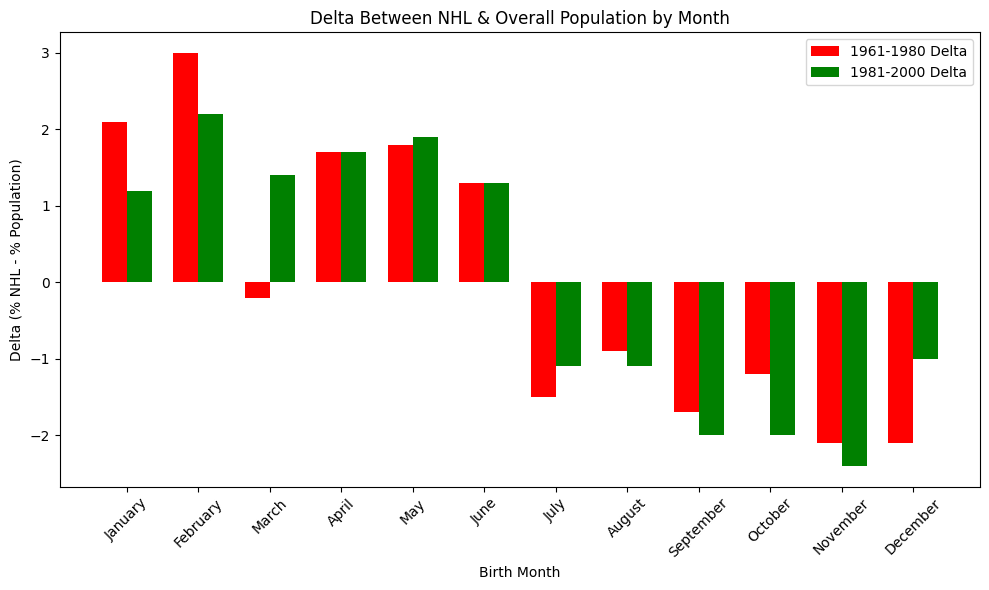

In [299]:
# overall_pop is extracted from percent_pivot:
print(percent_pivot.columns)

overall_pop = percent_pivot["% of Canadian births 1991-2022"]
# nhl_groups is percent_pivot_filtered with columns "1961-1980" and "1981-2000":
nhl_groups = percent_pivot_filtered

# Define the ordered list of month names.
ordered_months = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

# Ensure the indices are in calendar order.
overall_pop = overall_pop.reindex(ordered_months)
nhl_groups = nhl_groups.reindex(ordered_months)

# Merge the overall population and NHL groups data into one DataFrame.
merged_df = pd.concat([overall_pop, nhl_groups], axis=1)
# The merged_df now has the following columns:
#   "% of Canadian births 1991-2022", "1961-1980", "1981-2000"

# Compute the delta (difference) for each NHL bucket compared to the overall population.
merged_df["1961-1980 delta"] = merged_df["1961-1980"] - merged_df["% of Canadian births 1991-2022"]
merged_df["1981-2000 delta"] = merged_df["1981-2000"] - merged_df["% of Canadian births 1991-2022"]

# --- Create a grouped bar chart with 2 bars per month ---

# Create numeric x positions for each month.
x = np.arange(len(ordered_months))
width = 0.35  # width of each bar

plt.figure(figsize=(10, 6))

# Plot the delta for 1961-1980 as red bars (shifted to the left)
bars1 = plt.bar(x - width/2, merged_df["1961-1980 delta"], width,
                label="1961-1980 Delta", color="red")

# Plot the delta for 1981-2000 as green bars (shifted to the right)
bars2 = plt.bar(x + width/2, merged_df["1981-2000 delta"], width,
                label="1981-2000 Delta", color="green")

# Customize the chart.
plt.xlabel("Birth Month")
plt.ylabel("Delta (% NHL - % Population)")
plt.title("Delta Between NHL & Overall Population by Month")
plt.xticks(x, ordered_months, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

One may speculate that there might be some other factors that influence on why earlier birth months have higher chance to making it to the NHL, such as different physical attributes. Let's explore that.

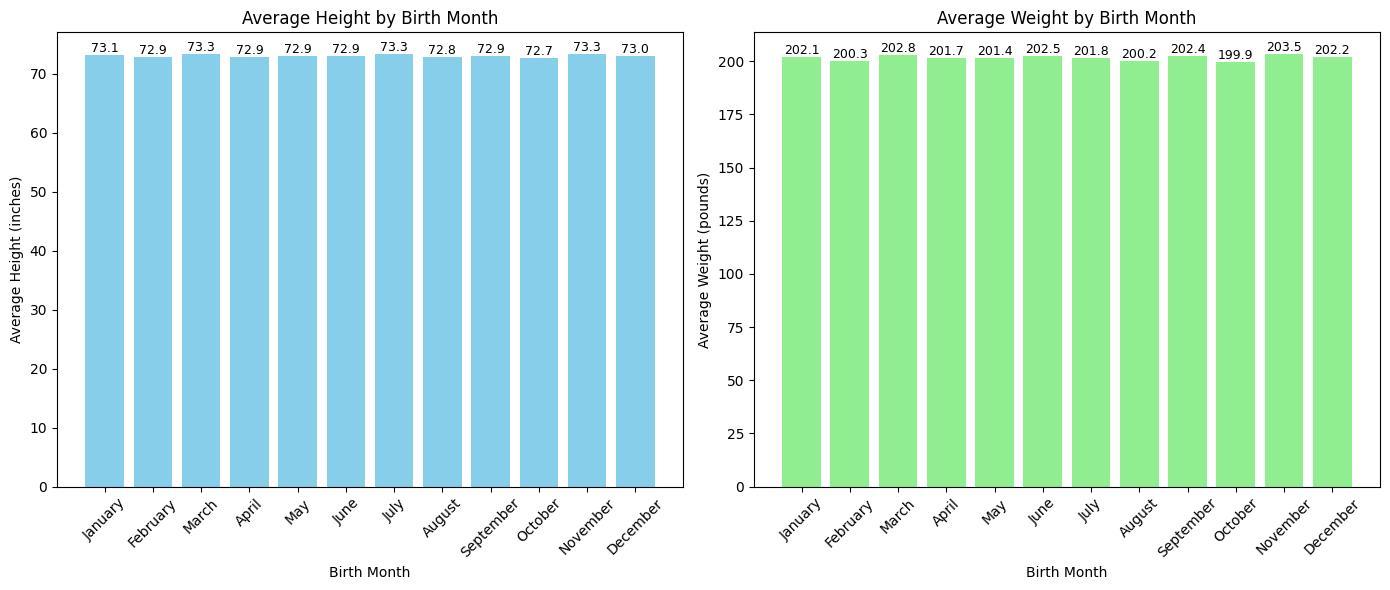

In [300]:
avg_height = filtered_df.groupby('birth_month')['height_in_inches'].mean()
avg_weight = filtered_df.groupby('birth_month')['weight_in_pounds'].mean()

# Map numeric month values to month names.
month_names = {
    1: "January", 2: "February", 3: "March", 4: "April",
    5: "May", 6: "June", 7: "July", 8: "August",
    9: "September", 10: "October", 11: "November", 12: "December"
}
avg_height.index = avg_height.index.map(month_names)
avg_weight.index = avg_weight.index.map(month_names)

# Reorder both Series by the calendar month order.
ordered_months = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
avg_height = avg_height.reindex(ordered_months)
avg_weight = avg_weight.reindex(ordered_months)

# --- Create 2 subplots side by side ---
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart for Average Height by Birth Month.
bars0 = axs[0].bar(avg_height.index, avg_height, color='skyblue')
axs[0].set_xlabel("Birth Month")
axs[0].set_ylabel("Average Height (inches)")
axs[0].set_title("Average Height by Birth Month")
axs[0].tick_params(axis='x', rotation=45)
# Annotate each bar with its value.
for bar in bars0:
    height = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width()/2, height,
                f'{height:.1f}', ha='center', va='bottom', fontsize=9)

# Bar chart for Average Weight by Birth Month.
bars1 = axs[1].bar(avg_weight.index, avg_weight, color='lightgreen')
axs[1].set_xlabel("Birth Month")
axs[1].set_ylabel("Average Weight (pounds)")
axs[1].set_title("Average Weight by Birth Month")
axs[1].tick_params(axis='x', rotation=45)
# Annotate each bar with its value.
for bar in bars1:
    weight = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2, weight,
                f'{weight:.1f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

### Import packages for data analysis

In [301]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
football = pd.read_csv('data/nfl_players.csv',index_col=0)
#check the number of rows
len(football)
#check data for observation
football.head(10)


,height,weight,birthDate,collegeName,position,displayName,corrected_birthDate,Age
nflId,,,,,,,,
25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady,1977-08-03,47
29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters,1982-01-22,42
29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers,1983-12-02,41
30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis,1984-05-19,40
33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan,1985-05-17,39
33099,6-6,245,1985-01-16,Delaware,QB,Joe Flacco,1985-01-16,39
33107,6-4,315,1985-08-30,Virginia Tech,T,Duane Brown,1985-08-30,39
33130,5-10,175,1986-12-01,California,WR,DeSean Jackson,1986-12-01,38
33131,6-8,300,1986-09-01,Miami,DE,Calais Campbell,1986-09-01,38


In [302]:
#check the data types of the columns and the number of non-null values
#check the data types of the columns and the number of non-null values

football.dtypes
football.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1697 entries, 25511 to 55241
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   height               1697 non-null   object
 1   weight               1697 non-null   int64 
 2   birthDate            1210 non-null   object
 3   collegeName          1697 non-null   object
 4   position             1697 non-null   object
 5   displayName          1697 non-null   object
 6   corrected_birthDate  1696 non-null   object
 7   Age                  1697 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 119.3+ KB


In [303]:
#check the data types of the columns and the number of non-null values
football.describe()

,weight,Age
count,1697.000000,1697.000000
mean,245.774308,28.428992
std,47.256005,3.550154
min,153.000000,0.000000
25%,205.000000,26.000000
50%,236.000000,28.000000
75%,291.000000,30.000000
max,380.000000,74.000000


In [304]:
#check the data types of the columns and the number of non-null values
football.describe(include='all')   

,height,weight,birthDate,collegeName,position,displayName,corrected_birthDate,Age
count,1697,1697.000000,1210,1697,1697,1697,1696,1697.000000
unique,16,NaN,989,225,19,1687,1321,NaN
top,6-3,NaN,1997-08-20,Alabama,WR,Michael Carter,1998-06-09,NaN
freq,258,NaN,4,59,224,2,5,NaN
mean,NaN,245.774308,NaN,NaN,NaN,NaN,NaN,28.428992
std,NaN,47.256005,NaN,NaN,NaN,NaN,NaN,3.550154
min,NaN,153.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,205.000000,NaN,NaN,NaN,NaN,NaN,26.000000
50%,NaN,236.000000,NaN,NaN,NaN,NaN,NaN,28.000000
75%,NaN,291.000000,NaN,NaN,NaN,NaN,NaN,30.000000


In [305]:
# Add a new column to split the month from the birthDate column
football['birthMonth'] = pd.to_datetime(football['birthDate'], errors='coerce').dt.month
# Add a new column to extract the year from the birthDate column
football['birthYear'] = pd.to_datetime(football['birthDate'], errors='coerce').dt.year
football.head(10)

,height,weight,birthDate,collegeName,position,displayName,corrected_birthDate,Age,birthMonth,birthYear
nflId,,,,,,,,,,
25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady,1977-08-03,47,8.0,1977.0
29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters,1982-01-22,42,1.0,1982.0
29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers,1983-12-02,41,12.0,1983.0
30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis,1984-05-19,40,5.0,1984.0
33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan,1985-05-17,39,5.0,1985.0
33099,6-6,245,1985-01-16,Delaware,QB,Joe Flacco,1985-01-16,39,1.0,1985.0
33107,6-4,315,1985-08-30,Virginia Tech,T,Duane Brown,1985-08-30,39,8.0,1985.0
33130,5-10,175,1986-12-01,California,WR,DeSean Jackson,1986-12-01,38,12.0,1986.0
33131,6-8,300,1986-09-01,Miami,DE,Calais Campbell,1986-09-01,38,9.0,1986.0


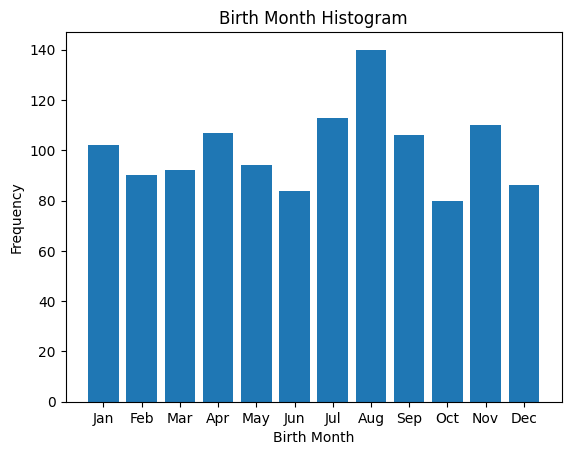

In [306]:
#create a histogram of the birthMonth column
# Count the occurrences of each month
# Note: The histogram will not show months with 0 occurrences.
histogram = football['birthMonth'].value_counts().sort_index()
histogram
# Plotting the histogram
import matplotlib.pyplot as plt

# Update x-axis labels to include all 12 months
plt.bar(range(1, 13), [histogram.get(i, 0) for i in range(1, 13)])
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Birth Month')
plt.ylabel('Frequency')
plt.title('Birth Month Histogram')
plt.show()

In [307]:
#create a pivot of the birthMonth column and the birthYear column
# Create a pivot table to count the number of players born in each month for each year
pivot_table = football.pivot_table(index='birthYear', columns='birthMonth', aggfunc='size', fill_value=0)
# Display the pivot table
pivot_table

birthMonth,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
birthYear,,,,,,,,,,,,
1977.0,0,0,0,0,0,0,0,1,0,0,0,0
1982.0,1,0,0,0,0,0,0,0,0,0,0,0
1983.0,0,0,0,0,0,0,0,0,0,0,0,1
1984.0,0,0,0,0,1,0,0,0,0,0,0,0
1985.0,1,0,0,0,1,0,1,1,1,2,0,0
1986.0,0,0,0,0,0,0,0,0,1,1,0,1
1987.0,0,0,1,0,1,0,0,1,1,1,2,0
1988.0,0,2,0,2,1,3,3,2,0,0,1,1
1989.0,4,3,2,2,2,3,4,2,1,2,2,1
